# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

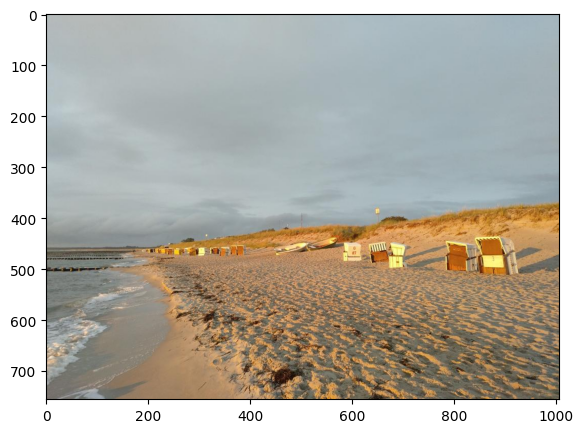

In [13]:
img = cv2.imread('./data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1c5f8ac7110>)

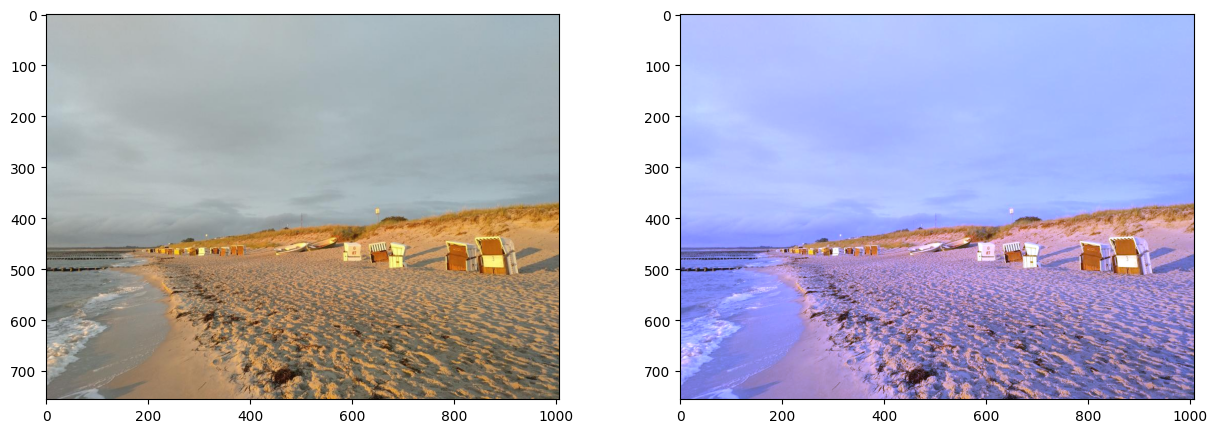

In [14]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x1c610bbf990>)

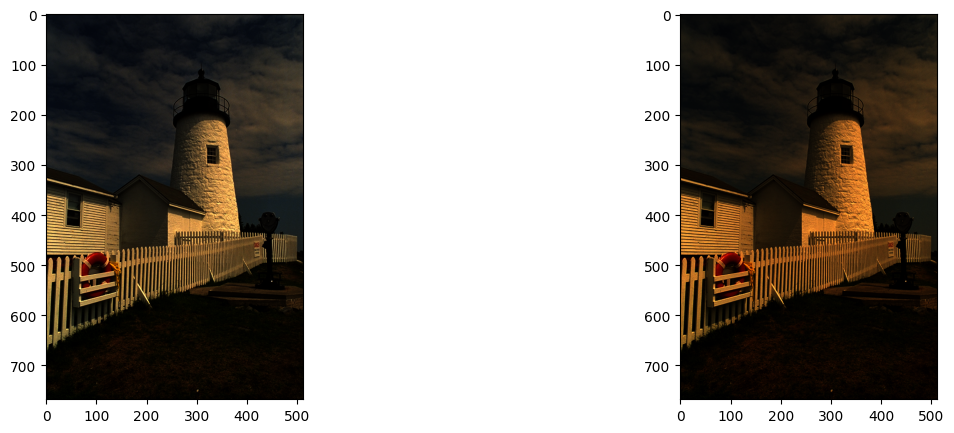

In [61]:
# Load your image
img = cv2.imread('./data/dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])
# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = 1
kg = mean_g / mean_r
kb = mean_b / mean_r

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] * kr
balanced[..., 1] = img[..., 1] * kg
balanced[..., 2] = img[..., 2] * kb

# Clip the values to ensure they are within the valid range [0, 255]
balanced = np.clip(balanced, 0, 255)
balanced = balanced.astype(np.uint8)


# Clip the values to ensure they are within the valid range [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)
# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x1c60dd82ed0>)

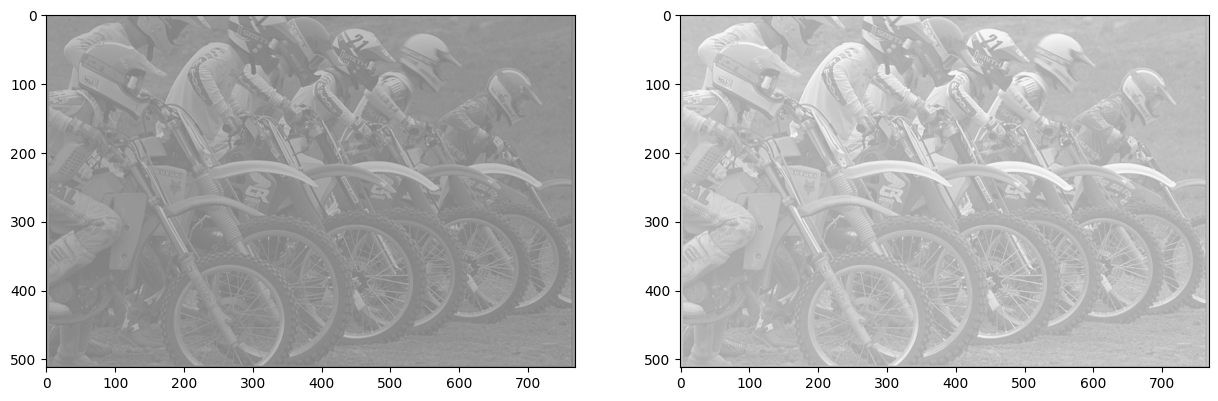

In [59]:
# Load your image
img = cv2.imread('./data/kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = img[:, :, 0] * (255.0 / max_r)
balanced[:, :, 1] = img[:, :, 1] * (255.0 / max_g)
balanced[:, :, 2] = img[:, :, 2] * (255.0 / max_b)

# Clip values to ensure they are within the valid range [0, 255]
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

Histogram Equalization

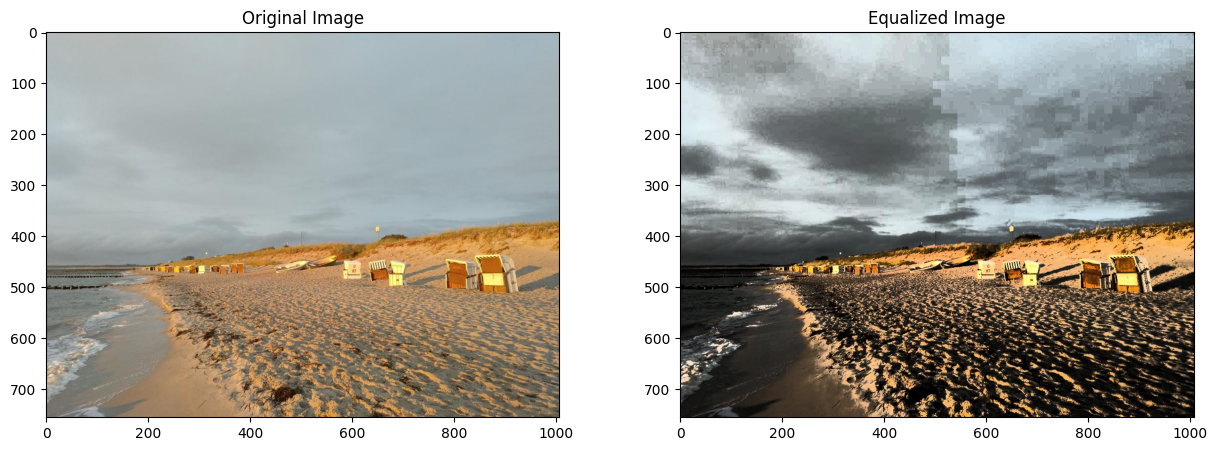

In [54]:
# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Separate the Hue, Saturation, and Value channels
hue_channel = hsv_img[:,:,0]
saturation_channel = hsv_img[:,:,1]
value_channel = hsv_img[:,:,2]

# Perform histogram equalization on the Value channel
equalized_value_channel = cv2.equalizeHist(value_channel)

# Merge the equalized Value channel back with the original Hue and Saturation channels
equalized_hsv_img = np.stack((hue_channel, saturation_channel, equalized_value_channel), axis=-1)

# Convert the equalized HSV image back to RGB color space
equalized_rgb_img = cv2.cvtColor(equalized_hsv_img, cv2.COLOR_HSV2RGB)

# Show the original and equalized images side by side
plt.subplot(121), plt.imshow(img)
plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_rgb_img)
plt.title('Equalized Image')
plt.show()


Conclusions: 
1. Різні піксельні операції можуть дати різні результати на різних зображеннях залежно від їхнього вмісту, контрастності, освітлення, кольорової палітри та інших факторів. Наприклад, операція розмиття може зменшити деталі на детальному зображенні, але поліпшити зовнішній вигляд розмитих контурів на шумних зображеннях.

2. Таке різноманіття результатів відбувається через те, що кожне зображення має унікальні характеристики, які впливають на те, як піксельні операції взаємодіють з його пікселями. Наприклад, якщо зображення має різкі контрастні переходи, то операція розмиття може вирівняти ці переходи, тоді як на менш контрастних зображеннях цей ефект може бути менш помітним.

3. Вибір піксельної операції залежить від мети обробки зображення і його характеристик. Наприклад:

    - Для поліпшення різкості та контрастності деталей можна використовувати операції підвищення різкості.
    - Для зменшення шуму чи видалення дефектів можна застосовувати фільтри розмиття чи медіанного фільтрування.
    - Для покращення яскравості та насиченості кольорів можна використовувати операції корекції кольору.

